In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('news.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 4)

In [5]:
data.drop('Unnamed: 0', axis=1)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
from matplotlib import pyplot as plt

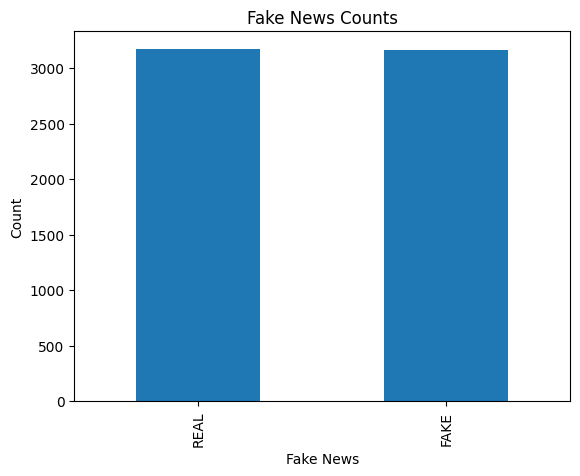

In [7]:
fake_news_counts = data['label'].value_counts()

# Plot the counts as a bar chart
fake_news_counts.plot.bar()

# Add axis labels and title
plt.xlabel('Fake News')
plt.ylabel('Count')
plt.title('Fake News Counts')

# Display the plot
plt.show()

In [8]:
fake_news_counts

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [9]:
# Define a dictionary to map 'Real' and 'Fake' values to 1 and 0
mapping = {'REAL': 1, 'FAKE': 0}

# Apply mapping to label column
cols_to_map = ['label']
for col in cols_to_map:
    data[col] = data[col].map(mapping)

# Display the updated dataframe
print(data.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  label  
0  Daniel Greenfield, a Shillman Journalism Fello...      0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0  
2  U.S. Secretary of State John F. Kerry said Mon...      1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0  
4  It's primary day in New York and front-runners...      1  


In [10]:
data.drop('Unnamed: 0', axis=1)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from transformers import LongformerTokenizer

In [12]:
# Load a pre-trained Longformer tokenizer
tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")

In [13]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


In [14]:
# Tokenize the dataset
input_ids = []
attention_mask = []

In [15]:
for index, row in data.iterrows():
    input_text = row["title"] + " " + row["text"]
    tokenized = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    input_ids.append(tokenized["input_ids"])
    attention_mask.append(tokenized["attention_mask"])


In [16]:
input_ids = torch.tensor(input_ids, dtype=torch.long)
attention_mask = torch.tensor(attention_mask, dtype=torch.long)
labels = torch.tensor(data["label"].values, dtype=torch.long)

In [17]:
print(input_ids)

tensor([[    0,  1185,  2615,  ...,     5, 44173,     2],
        [    0, 14287,    20,  ...,  2551,     7,     2],
        [    0,   530, 11228,  ...,   143, 10903,     2],
        ...,
        [    0, 40948,    12,  ...,    16,     5,     2],
        [    0,  1121, 13934,  ...,    17,    27,     2],
        [    0,   863,  3209,  ...,    28,   127,     2]])


In [18]:
print(attention_mask)

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])


In [19]:
# Split set
batch_size = 16
tokenized_dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, labels)
train_data, test_data = train_test_split(tokenized_dataset, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)


In [20]:


# Create DataLoaders for training, validation, and test
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [21]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx == 0:
        input_ids, attention_mask, labels = batch
        # Print or process the first batch here
        print("Batch 0 - Input IDs:", input_ids)
        print("Batch 0 - Attention Mask:", attention_mask)
        print("Batch 0 - Labels:", labels)
        break  # Stop after processing the first batch


Batch 0 - Input IDs: tensor([[    0,   347,  4405,  ...,     7,  4073,     2],
        [    0,   133,  5463,  ...,  4035,     6,     2],
        [    0, 39648,  1534,  ...,     1,     1,     1],
        ...,
        [    0,  2264,     7,  ...,  1983,    40,     2],
        [    0, 24596,    35,  ...,     1,     1,     1],
        [    0, 11773,    18,  ...,     1,     1,     1]])
Batch 0 - Attention Mask: tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Batch 0 - Labels: tensor([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])


In [22]:
for batch_idx, batch in enumerate(test_dataloader):
    if batch_idx == 0:
        input_ids, attention_mask, labels = batch
        # Print or process the first batch here
        print("Batch 0 - Input IDs:", input_ids)
        print("Batch 0 - Attention Mask:", attention_mask)
        print("Batch 0 - Labels:", labels)
        break  # Stop after processing the first batch


Batch 0 - Input IDs: tensor([[    0,  9064,    35,  ..., 50118,  1121,     2],
        [    0,   133,   588,  ...,     5,   768,     2],
        [    0, 10431, 35038,  ...,  9856,    72,     2],
        ...,
        [    0,  1106,  1464,  ...,    29, 25128,     2],
        [    0,  1779, 11234,  ...,     1,     1,     1],
        [    0, 38655,    17,  ...,  2396,  5903,     2]])
Batch 0 - Attention Mask: tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])
Batch 0 - Labels: tensor([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])


In [23]:
from transformers import LongformerModel, LongformerTokenizer

class FakeNewsDetectionModel(nn.Module):
    def __init__(self, num_classes=2):
        super(FakeNewsDetectionModel, self).__init__()
        self.longformer = LongformerModel.from_pretrained('allenai/longformer-base-4096')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.longformer.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.longformer(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # Using the [CLS] token representation
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits


In [24]:
device = torch.device("cpu")

In [25]:
# instantiate your model
fake_news_model = FakeNewsDetectionModel(num_classes=2).to(device)

In [26]:
print(fake_news_model)

FakeNewsDetectionModel(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4098, 768, padding_idx=1)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
              (value_gl

In [27]:
# define your loss function
criterion = nn.CrossEntropyLoss()

# define your optimizer
optimizer = torch.optim.Adam(fake_news_model.parameters(), lr=0.001)

In [28]:
       
from tqdm import tqdm
num_epochs = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        # Unpack the batch into input_ids, attention_mask, and labels
        input_ids, attention_mask, labels = [tensor.to(device) for tensor in batch]
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = fake_news_model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # print running loss for each batch
        running_loss += loss.item()
        avg_loss = running_loss / len(train_dataloader)
        avg_acc = correct_predictions / total_predictions
        tqdm.write(f'Train Loss: {avg_loss:.3f}, Train Acc: {avg_acc:.3f}', end='\r')
    tqdm.write(f'Epoch {epoch+1}, Train Loss: {avg_loss:.3f}, Train Acc: {avg_acc:.3f}')

    print(f"Epoch {epoch+1} finished")


Epoch 1/1:   0%|          | 1/317 [01:41<8:56:18, 101.83s/it]

Epoch 1/1:   1%|          | 2/317 [03:24<8:58:07, 102.50s/it]

Epoch 1/1:   1%|          | 3/317 [05:02<8:45:03, 100.33s/it]

Epoch 1/1:   1%|▏         | 4/317 [06:40<8:39:08, 99.52s/it] 

Epoch 1/1:   2%|▏         | 5/317 [08:23<8:42:46, 100.54s/it]

Epoch 1/1:   2%|▏         | 6/317 [10:02<8:39:00, 100.13s/it]

Epoch 1/1:   2%|▏         | 7/317 [11:38<8:30:03, 98.72s/it] 

Epoch 1/1:   3%|▎         | 8/317 [13:15<8:25:56, 98.24s/it]

Epoch 1/1:   3%|▎         | 9/317 [14:54<8:25:44, 98.52s/it]

Epoch 1/1:   3%|▎         | 10/317 [16:26<8:13:05, 96.37s/it]

Epoch 1/1:   3%|▎         | 11/317 [18:03<8:12:09, 96.50s/it]

Epoch 1/1:   4%|▍         | 12/317 [19:31<7:57:22, 93.91s/it]

Epoch 1/1:   4%|▍         | 13/317 [21:04<7:55:24, 93.83s/it]

Epoch 1/1:   4%|▍         | 14/317 [22:42<8:00:05, 95.07s/it]

Epoch 1/1:   5%|▍         | 15/317 [24:20<8:03:28, 96.06s/it]

Epoch 1/1:   5%|▌         | 16/317 [26:01<8:09:00, 97.48s/it]

Epoch 1/1:   5%|▌         | 17/317 [27:38<8:07:06, 97.42s/it]

Epoch 1/1:   6%|▌         | 18/317 [29:12<8:00:09, 96.35s/it]

Epoch 1/1:   6%|▌         | 19/317 [30:50<8:00:23, 96.72s/it]

Epoch 1/1:   6%|▋         | 20/317 [32:24<7:55:06, 95.98s/it]

Epoch 1/1:   7%|▋         | 21/317 [34:00<7:53:15, 95.93s/it]

Epoch 1/1:   7%|▋         | 22/317 [35:39<7:55:51, 96.79s/it]

Epoch 1/1:   7%|▋         | 23/317 [37:16<7:54:16, 96.79s/it]

Epoch 1/1:   8%|▊         | 24/317 [38:53<7:53:04, 96.88s/it]

Epoch 1/1:   8%|▊         | 25/317 [40:31<7:53:01, 97.20s/it]

Epoch 1/1:   8%|▊         | 26/317 [42:04<7:45:46, 96.04s/it]

Epoch 1/1:   9%|▊         | 27/317 [43:41<7:46:10, 96.45s/it]

Epoch 1/1:   9%|▉         | 28/317 [45:17<7:43:15, 96.18s/it]

Epoch 1/1:   9%|▉         | 29/317 [46:57<7:47:23, 97.37s/it]

Epoch 1/1:   9%|▉         | 30/317 [48:31<7:40:36, 96.29s/it]

Epoch 1/1:  10%|▉         | 31/317 [49:59<7:27:17, 93.84s/it]

Epoch 1/1:  10%|█         | 32/317 [51:37<7:31:40, 95.09s/it]

Epoch 1/1:  10%|█         | 33/317 [53:14<7:33:18, 95.77s/it]

Epoch 1/1:  11%|█         | 34/317 [54:49<7:30:36, 95.54s/it]

Epoch 1/1:  11%|█         | 35/317 [56:23<7:26:04, 94.91s/it]

Epoch 1/1:  11%|█▏        | 36/317 [57:58<7:24:41, 94.95s/it]

Epoch 1/1:  12%|█▏        | 37/317 [59:34<7:25:20, 95.43s/it]

Epoch 1/1:  12%|█▏        | 38/317 [1:01:08<7:21:23, 94.92s/it]

Epoch 1/1:  12%|█▏        | 39/317 [1:02:44<7:21:27, 95.28s/it]

Epoch 1/1:  13%|█▎        | 40/317 [1:04:18<7:17:32, 94.77s/it]

Epoch 1/1:  13%|█▎        | 41/317 [1:05:56<7:20:03, 95.67s/it]

Epoch 1/1:  13%|█▎        | 42/317 [1:07:31<7:18:01, 95.57s/it]

Epoch 1/1:  14%|█▎        | 43/317 [1:09:03<7:11:13, 94.43s/it]

Epoch 1/1:  14%|█▍        | 44/317 [1:10:50<7:27:41, 98.39s/it]

Epoch 1/1:  14%|█▍        | 45/317 [1:12:24<7:19:05, 96.86s/it]

Epoch 1/1:  15%|█▍        | 46/317 [1:13:56<7:11:45, 95.59s/it]

Epoch 1/1:  15%|█▍        | 47/317 [1:15:29<7:06:58, 94.88s/it]

Epoch 1/1:  15%|█▌        | 48/317 [1:17:04<7:05:21, 94.87s/it]

Epoch 1/1:  15%|█▌        | 49/317 [1:18:39<7:03:41, 94.86s/it]

Epoch 1/1:  16%|█▌        | 50/317 [1:20:03<6:47:31, 91.58s/it]

Epoch 1/1:  16%|█▌        | 51/317 [1:21:41<6:53:50, 93.35s/it]

Epoch 1/1:  16%|█▋        | 52/317 [1:23:19<6:59:18, 94.94s/it]

Epoch 1/1:  17%|█▋        | 53/317 [1:24:54<6:57:32, 94.90s/it]

Epoch 1/1:  17%|█▋        | 54/317 [1:26:26<6:51:51, 93.96s/it]

Epoch 1/1:  17%|█▋        | 55/317 [1:28:01<6:52:10, 94.39s/it]

Epoch 1/1:  18%|█▊        | 56/317 [1:29:36<6:51:46, 94.66s/it]

Epoch 1/1:  18%|█▊        | 57/317 [1:31:16<6:56:09, 96.04s/it]

Epoch 1/1:  18%|█▊        | 58/317 [1:32:50<6:52:25, 95.54s/it]

Epoch 1/1:  19%|█▊        | 59/317 [1:34:25<6:50:41, 95.51s/it]

Epoch 1/1:  19%|█▉        | 60/317 [1:36:02<6:50:05, 95.74s/it]

Epoch 1/1:  19%|█▉        | 61/317 [1:37:40<6:51:14, 96.39s/it]

Epoch 1/1:  20%|█▉        | 62/317 [1:39:14<6:47:15, 95.83s/it]

Epoch 1/1:  20%|█▉        | 63/317 [1:40:49<6:43:49, 95.39s/it]

Epoch 1/1:  20%|██        | 64/317 [1:42:25<6:43:30, 95.69s/it]

Epoch 1/1:  21%|██        | 65/317 [1:44:05<6:47:09, 96.94s/it]

Epoch 1/1:  21%|██        | 66/317 [1:45:43<6:47:01, 97.30s/it]

Epoch 1/1:  21%|██        | 67/317 [1:47:21<6:46:11, 97.49s/it]

Epoch 1/1:  21%|██▏       | 68/317 [1:48:56<6:42:03, 96.88s/it]

Epoch 1/1:  22%|██▏       | 69/317 [1:50:21<6:25:12, 93.20s/it]

Epoch 1/1:  22%|██▏       | 70/317 [1:51:57<6:27:28, 94.12s/it]

Epoch 1/1:  22%|██▏       | 71/317 [1:53:38<6:34:41, 96.27s/it]

Epoch 1/1:  23%|██▎       | 72/317 [1:55:15<6:33:40, 96.41s/it]

Epoch 1/1:  23%|██▎       | 73/317 [1:56:54<6:34:30, 97.01s/it]

Epoch 1/1:  23%|██▎       | 74/317 [1:58:28<6:30:05, 96.32s/it]

Epoch 1/1:  24%|██▎       | 75/317 [2:00:05<6:28:34, 96.34s/it]

Epoch 1/1:  24%|██▍       | 76/317 [2:01:41<6:26:57, 96.34s/it]

Epoch 1/1:  24%|██▍       | 77/317 [2:03:17<6:25:14, 96.31s/it]

Epoch 1/1:  25%|██▍       | 78/317 [2:04:51<6:20:01, 95.40s/it]

Epoch 1/1:  25%|██▍       | 79/317 [2:06:27<6:19:12, 95.60s/it]

Epoch 1/1:  25%|██▌       | 80/317 [2:08:05<6:20:45, 96.39s/it]

Epoch 1/1:  26%|██▌       | 81/317 [2:09:38<6:14:54, 95.31s/it]

Epoch 1/1:  26%|██▌       | 82/317 [2:11:15<6:15:22, 95.84s/it]

Epoch 1/1:  26%|██▌       | 83/317 [2:12:46<6:08:48, 94.57s/it]

Epoch 1/1:  26%|██▋       | 84/317 [2:14:22<6:08:59, 95.02s/it]

Epoch 1/1:  27%|██▋       | 85/317 [2:16:03<6:13:29, 96.59s/it]

Epoch 1/1:  27%|██▋       | 86/317 [2:17:38<6:10:18, 96.18s/it]

Epoch 1/1:  27%|██▋       | 87/317 [2:19:20<6:15:35, 97.98s/it]

Epoch 1/1:  28%|██▊       | 88/317 [2:20:54<6:09:35, 96.83s/it]

Epoch 1/1:  28%|██▊       | 89/317 [2:22:31<6:07:42, 96.77s/it]

Epoch 1/1:  28%|██▊       | 90/317 [2:24:11<6:09:23, 97.63s/it]

Epoch 1/1:  29%|██▊       | 91/317 [2:25:46<6:05:51, 97.13s/it]

Epoch 1/1:  29%|██▉       | 92/317 [2:27:25<6:05:52, 97.57s/it]

Epoch 1/1:  29%|██▉       | 93/317 [2:29:01<6:02:38, 97.14s/it]

Epoch 1/1:  30%|██▉       | 94/317 [2:30:40<6:03:13, 97.73s/it]

Epoch 1/1:  30%|██▉       | 95/317 [2:32:14<5:57:17, 96.57s/it]

Epoch 1/1:  30%|███       | 96/317 [2:33:50<5:54:21, 96.20s/it]

Epoch 1/1:  31%|███       | 97/317 [2:35:28<5:55:21, 96.92s/it]

Epoch 1/1:  31%|███       | 98/317 [2:37:07<5:55:33, 97.42s/it]

Epoch 1/1:  31%|███       | 99/317 [2:38:55<6:05:26, 100.58s/it]

Epoch 1/1:  32%|███▏      | 100/317 [2:40:33<6:01:07, 99.85s/it]

Epoch 1/1:  32%|███▏      | 101/317 [2:42:09<5:55:44, 98.82s/it]

Epoch 1/1:  32%|███▏      | 102/317 [2:43:44<5:49:17, 97.48s/it]

Epoch 1/1:  32%|███▏      | 103/317 [2:45:16<5:41:57, 95.87s/it]

Epoch 1/1:  33%|███▎      | 104/317 [2:46:56<5:45:17, 97.27s/it]

Epoch 1/1:  33%|███▎      | 105/317 [2:48:48<5:59:17, 101.69s/it]

Epoch 1/1:  33%|███▎      | 106/317 [2:50:29<5:57:00, 101.52s/it]

Epoch 1/1:  34%|███▍      | 107/317 [2:52:05<5:48:56, 99.70s/it] 

Epoch 1/1:  34%|███▍      | 108/317 [2:53:47<5:49:47, 100.42s/it]

Epoch 1/1:  34%|███▍      | 109/317 [2:55:23<5:43:21, 99.05s/it] 

Epoch 1/1:  35%|███▍      | 110/317 [2:57:03<5:43:26, 99.55s/it]

Epoch 1/1:  35%|███▌      | 111/317 [2:58:49<5:47:33, 101.23s/it]

Epoch 1/1:  35%|███▌      | 112/317 [3:00:31<5:47:01, 101.57s/it]

Epoch 1/1:  36%|███▌      | 113/317 [3:02:17<5:50:13, 103.01s/it]

Epoch 1/1:  36%|███▌      | 114/317 [3:04:00<5:47:46, 102.79s/it]

Epoch 1/1:  36%|███▋      | 115/317 [3:05:44<5:48:07, 103.41s/it]

Epoch 1/1:  37%|███▋      | 116/317 [3:07:28<5:47:01, 103.59s/it]

Epoch 1/1:  37%|███▋      | 117/317 [3:09:10<5:42:48, 102.84s/it]

Epoch 1/1:  37%|███▋      | 118/317 [3:10:55<5:43:12, 103.48s/it]

Epoch 1/1:  38%|███▊      | 119/317 [3:12:36<5:39:27, 102.87s/it]

Epoch 1/1:  38%|███▊      | 120/317 [3:14:19<5:37:52, 102.91s/it]

Epoch 1/1:  38%|███▊      | 121/317 [3:16:00<5:34:09, 102.29s/it]

Epoch 1/1:  38%|███▊      | 122/317 [3:17:38<5:28:44, 101.15s/it]

Epoch 1/1:  39%|███▉      | 123/317 [3:19:22<5:29:28, 101.90s/it]

Epoch 1/1:  39%|███▉      | 124/317 [3:21:03<5:26:37, 101.54s/it]

Epoch 1/1:  39%|███▉      | 125/317 [3:22:46<5:26:43, 102.10s/it]

Epoch 1/1:  40%|███▉      | 126/317 [3:24:34<5:30:09, 103.72s/it]

Epoch 1/1:  40%|████      | 127/317 [3:26:18<5:28:41, 103.80s/it]

Epoch 1/1:  40%|████      | 128/317 [3:28:04<5:29:42, 104.67s/it]

Epoch 1/1:  41%|████      | 129/317 [3:29:46<5:24:53, 103.69s/it]

Epoch 1/1:  41%|████      | 130/317 [3:31:31<5:24:45, 104.20s/it]

Epoch 1/1:  41%|████▏     | 131/317 [3:33:13<5:21:11, 103.61s/it]

Epoch 1/1:  42%|████▏     | 132/317 [3:34:54<5:17:09, 102.86s/it]

Epoch 1/1:  42%|████▏     | 133/317 [3:36:40<5:17:39, 103.58s/it]

Epoch 1/1:  42%|████▏     | 134/317 [3:38:33<5:24:29, 106.39s/it]

Epoch 1/1:  43%|████▎     | 135/317 [3:40:18<5:21:32, 106.00s/it]

Epoch 1/1:  43%|████▎     | 136/317 [3:42:06<5:22:03, 106.76s/it]

Epoch 1/1:  43%|████▎     | 137/317 [3:43:54<5:20:48, 106.94s/it]

Epoch 1/1:  44%|████▎     | 138/317 [3:45:38<5:16:46, 106.18s/it]

Epoch 1/1:  44%|████▍     | 139/317 [3:47:22<5:13:06, 105.54s/it]

Epoch 1/1:  44%|████▍     | 140/317 [3:49:05<5:09:22, 104.87s/it]

Epoch 1/1:  44%|████▍     | 141/317 [3:50:45<5:02:57, 103.28s/it]

Epoch 1/1:  45%|████▍     | 142/317 [3:52:25<4:58:16, 102.26s/it]

Epoch 1/1:  45%|████▌     | 143/317 [3:54:07<4:56:07, 102.11s/it]

Epoch 1/1:  45%|████▌     | 144/317 [3:55:44<4:50:41, 100.82s/it]

Epoch 1/1:  46%|████▌     | 145/317 [3:57:23<4:47:16, 100.21s/it]

Epoch 1/1:  46%|████▌     | 146/317 [3:59:01<4:43:14, 99.38s/it] 

Epoch 1/1:  46%|████▋     | 147/317 [4:00:38<4:39:57, 98.81s/it]

Epoch 1/1:  47%|████▋     | 148/317 [4:02:14<4:36:06, 98.03s/it]

Epoch 1/1:  47%|████▋     | 149/317 [4:03:52<4:34:33, 98.06s/it]

Epoch 1/1:  47%|████▋     | 150/317 [4:05:38<4:39:16, 100.34s/it]

Epoch 1/1:  48%|████▊     | 151/317 [4:07:14<4:33:56, 99.02s/it] 

Epoch 1/1:  48%|████▊     | 152/317 [4:08:50<4:30:08, 98.23s/it]

Epoch 1/1:  48%|████▊     | 153/317 [4:10:30<4:29:43, 98.68s/it]

Epoch 1/1:  49%|████▊     | 154/317 [4:12:10<4:29:24, 99.17s/it]

Epoch 1/1:  49%|████▉     | 155/317 [4:13:50<4:28:07, 99.30s/it]

Epoch 1/1:  49%|████▉     | 156/317 [4:15:29<4:26:11, 99.20s/it]

Epoch 1/1:  50%|████▉     | 157/317 [4:17:08<4:24:31, 99.19s/it]

Epoch 1/1:  50%|████▉     | 158/317 [4:18:45<4:20:38, 98.35s/it]

Epoch 1/1:  50%|█████     | 159/317 [4:20:26<4:21:23, 99.26s/it]

Epoch 1/1:  50%|█████     | 160/317 [4:22:06<4:20:27, 99.54s/it]

Epoch 1/1:  51%|█████     | 161/317 [4:23:33<4:08:31, 95.59s/it]

Epoch 1/1:  51%|█████     | 162/317 [4:25:11<4:09:10, 96.46s/it]

Epoch 1/1:  51%|█████▏    | 163/317 [4:26:49<4:08:36, 96.86s/it]

Epoch 1/1:  52%|█████▏    | 164/317 [4:28:31<4:10:42, 98.31s/it]

Epoch 1/1:  52%|█████▏    | 165/317 [4:30:07<4:07:44, 97.79s/it]

Epoch 1/1:  52%|█████▏    | 166/317 [4:31:43<4:04:50, 97.29s/it]

Epoch 1/1:  53%|█████▎    | 167/317 [4:33:24<4:05:58, 98.39s/it]

Epoch 1/1:  53%|█████▎    | 168/317 [4:34:58<4:01:05, 97.09s/it]

Epoch 1/1:  53%|█████▎    | 169/317 [4:36:39<4:01:50, 98.04s/it]

Epoch 1/1:  54%|█████▎    | 170/317 [4:38:20<4:02:53, 99.14s/it]

Epoch 1/1:  54%|█████▍    | 171/317 [4:40:00<4:01:30, 99.25s/it]

Epoch 1/1:  54%|█████▍    | 172/317 [4:41:36<3:57:22, 98.22s/it]

Epoch 1/1:  55%|█████▍    | 173/317 [4:43:14<3:55:47, 98.25s/it]

Epoch 1/1:  55%|█████▍    | 174/317 [4:44:51<3:53:16, 97.88s/it]

Epoch 1/1:  55%|█████▌    | 175/317 [4:46:29<3:51:35, 97.85s/it]

Epoch 1/1:  56%|█████▌    | 176/317 [4:48:05<3:48:44, 97.34s/it]

Epoch 1/1:  56%|█████▌    | 177/317 [4:49:42<3:46:45, 97.18s/it]

Epoch 1/1:  56%|█████▌    | 178/317 [4:51:21<3:46:30, 97.77s/it]

Epoch 1/1:  56%|█████▋    | 179/317 [4:53:02<3:47:25, 98.88s/it]

Epoch 1/1:  57%|█████▋    | 180/317 [4:54:45<3:48:15, 99.97s/it]

Epoch 1/1:  57%|█████▋    | 181/317 [4:56:24<3:45:58, 99.69s/it]

Epoch 1/1:  57%|█████▋    | 182/317 [4:58:00<3:41:59, 98.67s/it]

Epoch 1/1:  58%|█████▊    | 183/317 [4:59:42<3:42:39, 99.70s/it]

Epoch 1/1:  58%|█████▊    | 184/317 [5:01:20<3:40:03, 99.27s/it]

Epoch 1/1:  58%|█████▊    | 185/317 [5:02:59<3:38:04, 99.12s/it]

Epoch 1/1:  59%|█████▊    | 186/317 [5:04:38<3:36:27, 99.14s/it]

Epoch 1/1:  59%|█████▉    | 187/317 [5:06:15<3:32:58, 98.29s/it]

Epoch 1/1:  59%|█████▉    | 188/317 [5:07:51<3:30:17, 97.81s/it]

Epoch 1/1:  60%|█████▉    | 189/317 [5:09:29<3:28:20, 97.66s/it]

Epoch 1/1:  60%|█████▉    | 190/317 [5:11:05<3:25:45, 97.21s/it]

Epoch 1/1:  60%|██████    | 191/317 [5:12:41<3:23:47, 97.04s/it]

Epoch 1/1:  61%|██████    | 192/317 [5:14:19<3:22:18, 97.11s/it]

Epoch 1/1:  61%|██████    | 193/317 [5:16:00<3:23:19, 98.38s/it]

Epoch 1/1:  61%|██████    | 194/317 [5:17:38<3:21:27, 98.27s/it]

Epoch 1/1:  62%|██████▏   | 195/317 [5:19:18<3:20:37, 98.67s/it]

Epoch 1/1:  62%|██████▏   | 196/317 [5:20:53<3:16:47, 97.58s/it]

Epoch 1/1:  62%|██████▏   | 197/317 [5:22:29<3:14:36, 97.31s/it]

Epoch 1/1:  62%|██████▏   | 198/317 [5:23:55<3:06:11, 93.88s/it]

Epoch 1/1:  63%|██████▎   | 199/317 [5:25:36<3:08:32, 95.87s/it]

Epoch 1/1:  63%|██████▎   | 200/317 [5:27:18<3:10:40, 97.78s/it]

Epoch 1/1:  63%|██████▎   | 201/317 [5:28:58<3:10:15, 98.41s/it]

Epoch 1/1:  64%|██████▎   | 202/317 [5:30:36<3:08:10, 98.17s/it]

Epoch 1/1:  64%|██████▍   | 203/317 [5:32:12<3:05:15, 97.50s/it]

Epoch 1/1:  64%|██████▍   | 204/317 [5:33:47<3:02:17, 96.79s/it]

Epoch 1/1:  65%|██████▍   | 205/317 [5:35:22<2:59:50, 96.34s/it]

Epoch 1/1:  65%|██████▍   | 206/317 [5:37:02<3:00:12, 97.41s/it]

Epoch 1/1:  65%|██████▌   | 207/317 [5:38:41<2:59:29, 97.90s/it]

Epoch 1/1:  66%|██████▌   | 208/317 [5:40:17<2:57:04, 97.47s/it]

Epoch 1/1:  66%|██████▌   | 209/317 [5:41:56<2:56:04, 97.82s/it]

Epoch 1/1:  66%|██████▌   | 210/317 [5:43:34<2:54:45, 98.00s/it]

Epoch 1/1:  67%|██████▋   | 211/317 [5:45:18<2:55:51, 99.54s/it]

Epoch 1/1:  67%|██████▋   | 212/317 [5:46:56<2:53:34, 99.18s/it]

Epoch 1/1:  67%|██████▋   | 213/317 [5:48:39<2:53:54, 100.33s/it]

Epoch 1/1:  68%|██████▊   | 214/317 [5:50:16<2:50:41, 99.43s/it] 

Epoch 1/1:  68%|██████▊   | 215/317 [5:51:59<2:50:45, 100.45s/it]

Epoch 1/1:  68%|██████▊   | 216/317 [5:53:40<2:49:20, 100.60s/it]

Epoch 1/1:  68%|██████▊   | 217/317 [5:55:19<2:46:53, 100.13s/it]

Epoch 1/1:  69%|██████▉   | 218/317 [5:57:00<2:45:25, 100.26s/it]

Epoch 1/1:  69%|██████▉   | 219/317 [5:58:37<2:42:13, 99.32s/it] 

Epoch 1/1:  69%|██████▉   | 220/317 [6:00:16<2:40:42, 99.40s/it]

Epoch 1/1:  70%|██████▉   | 221/317 [6:01:53<2:37:41, 98.56s/it]

Epoch 1/1:  70%|███████   | 222/317 [6:03:30<2:35:18, 98.08s/it]

Epoch 1/1:  70%|███████   | 223/317 [6:05:08<2:33:29, 97.97s/it]

Epoch 1/1:  71%|███████   | 224/317 [6:06:57<2:37:14, 101.45s/it]

Epoch 1/1:  71%|███████   | 225/317 [6:08:42<2:37:16, 102.57s/it]

Epoch 1/1:  71%|███████▏  | 226/317 [6:10:29<2:37:17, 103.71s/it]

Epoch 1/1:  72%|███████▏  | 227/317 [6:12:09<2:34:05, 102.73s/it]

Epoch 1/1:  72%|███████▏  | 228/317 [6:13:51<2:31:54, 102.41s/it]

Epoch 1/1:  72%|███████▏  | 229/317 [6:15:32<2:29:48, 102.14s/it]

Epoch 1/1:  73%|███████▎  | 230/317 [6:17:15<2:28:21, 102.31s/it]

Epoch 1/1:  73%|███████▎  | 231/317 [6:18:58<2:26:53, 102.49s/it]

Epoch 1/1:  73%|███████▎  | 232/317 [6:20:46<2:27:40, 104.25s/it]

Epoch 1/1:  74%|███████▎  | 233/317 [6:22:32<2:26:33, 104.68s/it]

Epoch 1/1:  74%|███████▍  | 234/317 [6:24:13<2:23:23, 103.65s/it]

Epoch 1/1:  74%|███████▍  | 235/317 [6:26:02<2:23:55, 105.31s/it]

Epoch 1/1:  74%|███████▍  | 236/317 [6:27:52<2:24:05, 106.73s/it]

Epoch 1/1:  75%|███████▍  | 237/317 [6:29:36<2:21:07, 105.84s/it]

Epoch 1/1:  75%|███████▌  | 238/317 [6:31:20<2:18:21, 105.08s/it]

Epoch 1/1:  75%|███████▌  | 239/317 [6:33:02<2:15:28, 104.21s/it]

Epoch 1/1:  76%|███████▌  | 240/317 [6:34:47<2:14:09, 104.54s/it]

Epoch 1/1:  76%|███████▌  | 241/317 [6:36:31<2:12:14, 104.40s/it]

Epoch 1/1:  76%|███████▋  | 242/317 [6:38:14<2:09:56, 103.95s/it]

Epoch 1/1:  77%|███████▋  | 243/317 [6:40:01<2:09:11, 104.75s/it]

Epoch 1/1:  77%|███████▋  | 244/317 [6:41:46<2:07:31, 104.82s/it]

Epoch 1/1:  77%|███████▋  | 245/317 [6:43:30<2:05:45, 104.79s/it]

Epoch 1/1:  78%|███████▊  | 246/317 [6:45:14<2:03:34, 104.43s/it]

Epoch 1/1:  78%|███████▊  | 247/317 [6:46:58<2:01:33, 104.19s/it]

Epoch 1/1:  78%|███████▊  | 248/317 [6:48:43<2:00:06, 104.43s/it]

Epoch 1/1:  79%|███████▊  | 249/317 [6:50:30<1:59:13, 105.20s/it]

Epoch 1/1:  79%|███████▉  | 250/317 [6:52:11<1:56:08, 104.01s/it]

Epoch 1/1:  79%|███████▉  | 251/317 [6:53:47<1:51:44, 101.58s/it]

Epoch 1/1:  79%|███████▉  | 252/317 [6:55:30<1:50:29, 101.98s/it]

Epoch 1/1:  80%|███████▉  | 253/317 [6:57:16<1:50:09, 103.27s/it]

Epoch 1/1:  80%|████████  | 254/317 [6:59:00<1:48:48, 103.62s/it]

Epoch 1/1:  80%|████████  | 255/317 [7:00:44<1:46:57, 103.50s/it]

Epoch 1/1:  81%|████████  | 256/317 [7:02:24<1:44:11, 102.48s/it]

Epoch 1/1:  81%|████████  | 257/317 [7:04:04<1:41:44, 101.75s/it]

Epoch 1/1:  81%|████████▏ | 258/317 [7:05:48<1:40:43, 102.42s/it]

Epoch 1/1:  82%|████████▏ | 259/317 [7:07:32<1:39:27, 102.89s/it]

Epoch 1/1:  82%|████████▏ | 260/317 [7:09:12<1:36:55, 102.02s/it]

Epoch 1/1:  82%|████████▏ | 261/317 [7:10:53<1:34:55, 101.71s/it]

Epoch 1/1:  83%|████████▎ | 262/317 [7:12:33<1:32:48, 101.24s/it]

Epoch 1/1:  83%|████████▎ | 263/317 [7:14:12<1:30:38, 100.72s/it]

Epoch 1/1:  83%|████████▎ | 264/317 [7:16:01<1:31:07, 103.16s/it]

Epoch 1/1:  84%|████████▎ | 265/317 [7:17:42<1:28:53, 102.57s/it]

Epoch 1/1:  84%|████████▍ | 266/317 [7:19:33<1:29:21, 105.12s/it]

Epoch 1/1:  84%|████████▍ | 267/317 [7:21:14<1:26:26, 103.72s/it]

Epoch 1/1:  85%|████████▍ | 268/317 [7:22:56<1:24:22, 103.31s/it]

Epoch 1/1:  85%|████████▍ | 269/317 [7:24:36<1:21:47, 102.23s/it]

Epoch 1/1:  85%|████████▌ | 270/317 [7:26:17<1:19:55, 102.02s/it]

Epoch 1/1:  85%|████████▌ | 271/317 [7:27:55<1:17:10, 100.65s/it]

Epoch 1/1:  86%|████████▌ | 272/317 [7:29:34<1:15:11, 100.25s/it]

Epoch 1/1:  86%|████████▌ | 273/317 [7:31:17<1:14:09, 101.12s/it]

Epoch 1/1:  86%|████████▋ | 274/317 [7:32:57<1:12:14, 100.79s/it]

Epoch 1/1:  87%|████████▋ | 275/317 [7:34:35<1:09:48, 99.72s/it] 

Epoch 1/1:  87%|████████▋ | 276/317 [7:36:18<1:08:47, 100.66s/it]

Epoch 1/1:  87%|████████▋ | 277/317 [7:37:59<1:07:21, 101.03s/it]

Epoch 1/1:  88%|████████▊ | 278/317 [7:39:41<1:05:46, 101.18s/it]

Epoch 1/1:  88%|████████▊ | 279/317 [7:41:23<1:04:17, 101.50s/it]

Epoch 1/1:  88%|████████▊ | 280/317 [7:43:05<1:02:34, 101.48s/it]

Epoch 1/1:  89%|████████▊ | 281/317 [7:44:54<1:02:20, 103.90s/it]

Epoch 1/1:  89%|████████▉ | 282/317 [7:46:40<1:00:52, 104.36s/it]

Epoch 1/1:  89%|████████▉ | 283/317 [7:48:22<58:52, 103.90s/it]  

Epoch 1/1:  90%|████████▉ | 284/317 [7:50:06<57:02, 103.71s/it]

Epoch 1/1:  90%|████████▉ | 285/317 [7:51:49<55:11, 103.50s/it]

Epoch 1/1:  90%|█████████ | 286/317 [7:53:30<53:09, 102.88s/it]

Epoch 1/1:  91%|█████████ | 287/317 [7:55:14<51:31, 103.06s/it]

Epoch 1/1:  91%|█████████ | 288/317 [7:56:55<49:36, 102.65s/it]

Epoch 1/1:  91%|█████████ | 289/317 [7:58:23<45:52, 98.31s/it] 

Epoch 1/1:  91%|█████████▏| 290/317 [8:00:11<45:25, 100.95s/it]

Epoch 1/1:  92%|█████████▏| 291/317 [8:02:01<44:59, 103.84s/it]

Epoch 1/1:  92%|█████████▏| 292/317 [8:03:54<44:25, 106.63s/it]

Epoch 1/1:  92%|█████████▏| 293/317 [8:05:48<43:28, 108.71s/it]

Epoch 1/1:  93%|█████████▎| 294/317 [8:07:26<40:27, 105.56s/it]

Epoch 1/1:  93%|█████████▎| 295/317 [8:09:05<37:58, 103.55s/it]

Epoch 1/1:  93%|█████████▎| 296/317 [8:10:45<35:50, 102.41s/it]

Epoch 1/1:  94%|█████████▎| 297/317 [8:12:43<35:41, 107.09s/it]

Epoch 1/1:  94%|█████████▍| 298/317 [8:14:28<33:44, 106.53s/it]

Epoch 1/1:  94%|█████████▍| 299/317 [8:16:08<31:24, 104.68s/it]

Epoch 1/1:  95%|█████████▍| 300/317 [8:17:50<29:25, 103.85s/it]

Epoch 1/1:  95%|█████████▍| 301/317 [8:19:33<27:36, 103.52s/it]

Epoch 1/1:  95%|█████████▌| 302/317 [8:21:17<25:53, 103.60s/it]

Epoch 1/1:  96%|█████████▌| 303/317 [8:23:00<24:10, 103.58s/it]

Epoch 1/1:  96%|█████████▌| 304/317 [8:24:48<22:42, 104.82s/it]

Epoch 1/1:  96%|█████████▌| 305/317 [8:26:35<21:04, 105.41s/it]

Epoch 1/1:  97%|█████████▋| 306/317 [8:28:18<19:11, 104.66s/it]

Epoch 1/1:  97%|█████████▋| 307/317 [8:29:56<17:09, 102.90s/it]

Epoch 1/1:  97%|█████████▋| 308/317 [8:31:38<15:23, 102.57s/it]

Epoch 1/1:  97%|█████████▋| 309/317 [8:33:25<13:50, 103.87s/it]

Epoch 1/1:  98%|█████████▊| 310/317 [8:35:16<12:22, 106.07s/it]

Epoch 1/1:  98%|█████████▊| 311/317 [8:37:12<10:53, 108.96s/it]

Epoch 1/1:  98%|█████████▊| 312/317 [8:39:02<09:05, 109.18s/it]

Epoch 1/1:  99%|█████████▊| 313/317 [8:40:46<07:10, 107.73s/it]

Epoch 1/1:  99%|█████████▉| 314/317 [8:42:34<05:23, 107.70s/it]

Epoch 1/1:  99%|█████████▉| 315/317 [8:44:16<03:31, 106.00s/it]

Epoch 1/1: 100%|█████████▉| 316/317 [8:46:02<01:46, 106.21s/it]

Epoch 1/1: 100%|██████████| 317/317 [8:47:06<00:00, 99.77s/it] 


Epoch 1, Train Loss: 0.708, Train Acc: 0.496
Epoch 1 finished


In [29]:
# Validation loop
with torch.no_grad():
    fake_news_model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for batch in val_dataloader:
        # Unpack the batch into input_ids, attention_mask, and labels
        input_ids, attention_mask, labels = [tensor.to(device) for tensor in batch]

        # forward
        outputs = fake_news_model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)

        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # calculate running loss
        valid_loss += loss.item()

    avg_loss = valid_loss / len(val_dataloader)
    avg_acc = correct_predictions / total_predictions
    print(f'Validation Loss: {avg_loss:.3f}, Validation Acc: {avg_acc:.3f}')

Validation Loss: 0.693, Validation Acc: 0.509


In [30]:
# Test loop
with torch.no_grad():
    fake_news_model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for batch in test_dataloader:
        # Unpack the batch into input_ids, attention_mask, and labels
        input_ids, attention_mask, labels = [tensor.to(device) for tensor in batch]

        # forward
        outputs = fake_news_model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)

        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # calculate running loss
        test_loss += loss.item()

    avg_loss = test_loss / len(test_dataloader)
    avg_acc = correct_predictions / total_predictions
    print(f'Test Loss: {avg_loss:.3f}, Test Acc: {avg_acc:.3f}')

Test Loss: 0.694, Test Acc: 0.483


In [31]:
# save the model
torch.save(fake_news_model.state_dict(), 'fake_news_model.pth')

In [43]:


# Sample text to evaluate
sample_text = "Drinking Age at Disney World May be Lowered to 18-- The National Minimum Drinking Age Act was passed by congress and signed into law by President Ronald Reagan in 1984. It “requires that States prohibit persons under 21 years of age from purchasing or publicly possessing alcoholic beverages as a condition of receiving State highway funds.” This was an act to encourage states to raise the minimum drinking age to 21. As it states, it is not mandatory that states set the drinking age at 21, but if a state doesn’t implement 21 as a minimum, the government will withhold state highway funds. Didn’t think you would get a history lesson from us, did you? Now that we have set up the act, we have some Disney news to go with it. Disney World is looking to defy the minimum drinking age act. The Walt Disney Company is currently battling the state of Florida in the courts over the minimum drinking age. Disney is attempting to lower the minimum drinking age on Disney property to 18. They are clearly doing this to increase their revenue at EPCOT and across Disney World. We all know how popular drinks are at EPCOT. Whether you are having a few different concoctions or drinking around the world, alcoholic drinks are a big part of the EPCOT culture."

# List to store input IDs and attention masks
input_ids = []
attention_mask = []

# Tokenize and preprocess the sample text
tokenized = tokenizer(sample_text, padding="max_length", truncation=True, max_length=512)
input_ids.append(tokenized["input_ids"])
attention_mask.append(tokenized["attention_mask"])

# Convert input_ids and attention_mask to PyTorch Tensors
input_ids = torch.tensor(input_ids, dtype=torch.long)
attention_mask = torch.tensor(attention_mask, dtype=torch.long)

# Set the model to evaluation mode
fake_news_model.eval()

input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Forward pass
with torch.no_grad():
    outputs = fake_news_model(input_ids=input_ids, attention_mask=attention_mask)
    predicted_class = torch.argmax(outputs, dim=1).item()

# Define class labels (0 for fake, 1 for real)
class_labels = ["FAKE", "REAL"]

# Get the predicted label
predicted_label = class_labels[predicted_class]

# Get the probability scores
probability_scores = torch.softmax(outputs, dim=1)
fake_probability = probability_scores[0][0].item()
real_probability = probability_scores[0][1].item()

# Print the result
print(f"Sample text: {sample_text}")
print(f"Predicted label: {predicted_label}")
print(f"Confidence - FAKE: {fake_probability * 100:.2f}%")
print(f"Confidence - REAL: {real_probability * 100:.2f}%")


Sample text: Drinking Age at Disney World May be Lowered to 18-- The National Minimum Drinking Age Act was passed by congress and signed into law by President Ronald Reagan in 1984. It “requires that States prohibit persons under 21 years of age from purchasing or publicly possessing alcoholic beverages as a condition of receiving State highway funds.” This was an act to encourage states to raise the minimum drinking age to 21. As it states, it is not mandatory that states set the drinking age at 21, but if a state doesn’t implement 21 as a minimum, the government will withhold state highway funds. Didn’t think you would get a history lesson from us, did you? Now that we have set up the act, we have some Disney news to go with it. Disney World is looking to defy the minimum drinking age act. The Walt Disney Company is currently battling the state of Florida in the courts over the minimum drinking age. Disney is attempting to lower the minimum drinking age on Disney property to 18. They